<a href="https://colab.research.google.com/github/JhonathaRicardo/ASAS/blob/master/ASAS_database_creator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***ASAS Database***
AUTHOR: Jhonatha R. dos Santos <br><br>
This notebook was developed to create the level and lines databases for ASAS software from NIST database.


#***Creating LINES Database***

##***Steps***


Creating ASAS Lines database:
1. Acess: https://physics.nist.gov/PhysRefData/ASD/lines_form.html
2. Define atom in *Spectrum* label (e.g., Fe I, Na; Mg; Al ...)
3. Configure *Advanced Settings* like:<br>

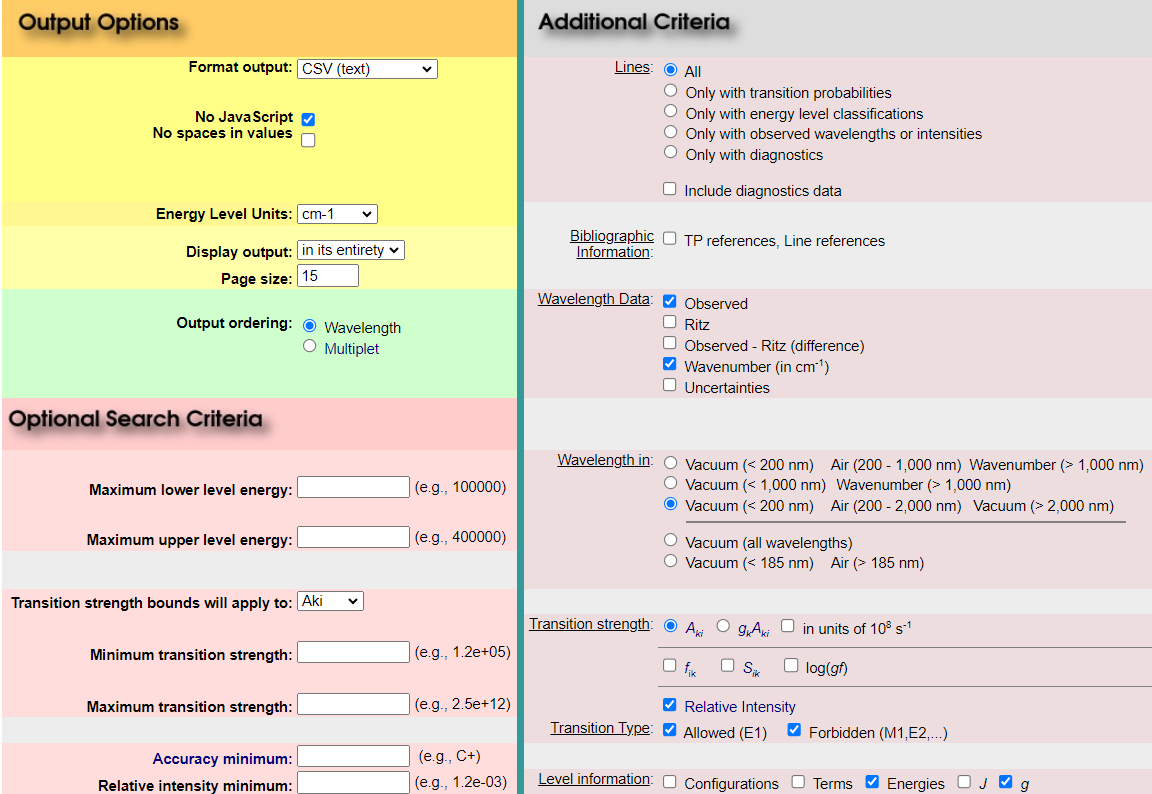

4. Save this CSV(text) in local area as a **txt** file.
5. Execute the ColabNotebook cells.

6. Define Atom name. **Use the NIST default!** (e.g., Fe I, Na; Mg; Al ...)
7. Open Files of this ColabNotebook and make the download of the **'Lines <(Atom_name)>.txt'** file.

##***Packages, Functions and Open Files***

In [4]:
#Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pds

In [5]:
#Functions
def remove_chars_lines(column):
    column = column.str.replace('=', '')
    column = column.str.replace('"', '')
    column = column.str.replace(' ', '')
    #column = column.str.replace('*', '')
    column = column.str.replace(r"[a-zA-Z]",'')
    column = column.str.replace(r"+",'e+')
    column = column.str.replace(r"-",'e-')
    return column

In [6]:
#Open Lines.txt file
from google.colab import files
uploaded = files.upload()

Saving LuI_lines.txt to LuI_lines.txt


###***Reading Files***

In [7]:
#reading csv file
df_lines = pds.read_csv(list(uploaded.keys())[0])

#Columm 2
wn = list(remove_chars_lines(df_lines['wn(cm-1)']))
wl_vac = list(1e7/np.asfarray(wn))
#Columm 3
wl_air = list(remove_chars_lines(df_lines['obs_wl_air(nm)']))
#Columm 4
RI = list((remove_chars_lines(df_lines['intens'])).replace(r'^\s*$', '00', regex=True))
#Columm 5
Aki = list((remove_chars_lines(df_lines['Aki(s^-1)'])).replace(r'^\s*$', '00', regex=True))
#Columm 6
dAki = list(np.zeros(len(Aki)))
#Columm 7
Ei = list((remove_chars_lines(df_lines['Ei(cm-1)'])).replace(r'^\s*$', '00', regex=True))
#Columm 8
gi = list(((df_lines['g_i'])).replace(r'^\s*$', '00', regex=True))
Ji = list((np.asfarray(gi)-1)/2)
#Columm 9
Ek = list((remove_chars_lines(df_lines['Ek(cm-1)'])).replace(r'^\s*$', '00', regex=True))
#Columm 10
gk = list(((df_lines['g_k'])).replace(r'^\s*$', '00', regex=True))
Jk = list((np.asfarray(gk)-1)/2)

<ipython-input-5-2bfd7d967c00>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  column = column.str.replace(r"[a-zA-Z]",'')
<ipython-input-5-2bfd7d967c00>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  column = column.str.replace(r"+",'e+')


###***Creating ASAS Database File***

In [8]:
df_lines_out = pds.DataFrame({'wl_vac':wl_vac, 'wl_air': wl_air,'RI':RI, 'Aki':Aki,
                              'dAki':dAki, 'Ei':Ei, 'Ji': Ji, 'Ek': Ek, 'Jk':Jk})

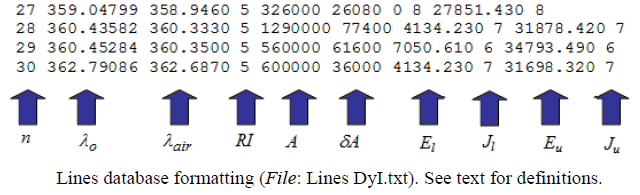

In [9]:
#Define the ATOM
Atom = 'LuI'

#Creating ASAS file
df_lines_out.to_csv((Atom + ' Lines.txt'), header = False, sep=' ')

---

#***Creating LEVELS Database***

##***Steps***


Creating ASAS Levels database:
1. Acess: https://physics.nist.gov/PhysRefData/ASD/levels_form.html
2. Define atom in *Spectrum* label (e.g., Fe I, Na; Mg; Al ...)
3. Configure *Advanced Settings* like:<br>

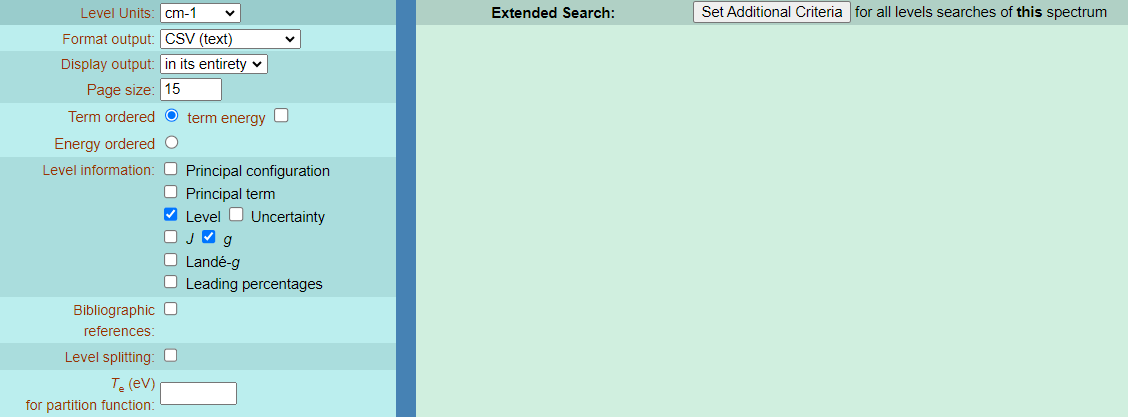

4. Save this CSV(text) in local area as a **txt** file. Verify that the first line of file has a **comma** '**,**' like:
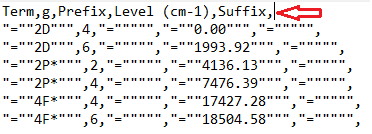
5. Execute the ColabNotebook cells.

6. Define Atom name. **Use the NIST default!** (e.g., Fe I, Na; Mg; Al ...)
7. Open Files of this ColabNotebook and make the download of the **'Lines <(Atom_name)>.txt'** file.

##***Packages, Functions and Open Files***

In [52]:
#Functions
def remove_chars_levels(column):
    column = column.str.replace('=', '')
    column = column.str.replace('"', '')
    column = column.str.replace(' ', '')
    column = column.str.replace(r"[a-zA-Z]",'')

    return column

In [40]:
#Open Level.txt file
from google.colab import files
uploaded_levels = files.upload()

Saving LuI_levels_NIST.txt to LuI_levels_NIST (4).txt


###***Reading Files***

In [64]:
#reading csv file
df_levels = pds.read_csv(list(uploaded_levels.keys())[0])

#Columm 1
P = (remove_chars_levels(df_levels['Term'])).str.replace("[0-9]",'')
P = P.replace('*', '01')
P = list(P.replace(r'^\s*$', '00', regex=True))
#Columm 2
E = list((remove_chars_levels(df_levels['Level (cm-1)'])).replace(r'^\s*$', '00', regex=True))
#Columm 3
g = list(((df_levels['g'])).replace(r'^\s*$', '00', regex=True))
J = list((np.asfarray(g)-1)/2)
#Columm 4
t = list((remove_chars_levels(df_levels['Suffix'])).replace(r'^\s*$', '00', regex=True))
#Columm 5
dt = t

<ipython-input-52-d38db8041c5d>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  column = column.str.replace(r"[a-zA-Z]",'')
<ipython-input-64-07f55c108c3b>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  P = (remove_chars_levels(df_levels['Term'])).str.replace("[0-9]",'')


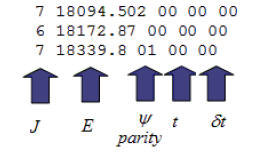

###***Creating ASAS Database File***

In [65]:
df_levels_out = pds.DataFrame({'J': J, 'Level (cm-1)': E, 'P':P, 't': t, 'dt': dt})

In [68]:
#Define the ATOM
Atom = 'LuI'

#Creating ASAS file
df_levels_out.to_csv((Atom + ' Levels.txt'), header = False, sep=' ')